<a href="https://colab.research.google.com/github/MJKhadeeja/ML-python-Projects/blob/Support-Vector-Machine/SVM(bmi_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
files.upload()

Saving bmi.csv to bmi.csv


{'bmi.csv': b'Gender,Height,Weight,Index\r\nMale,174,96,4\r\nMale,189,87,2\r\nFemale,185,110,4\r\nFemale,195,104,3\r\nMale,149,61,3\r\nMale,189,104,3\r\nMale,147,92,5\r\nMale,154,111,5\r\nMale,174,90,3\r\nFemale,169,103,4\r\nMale,195,81,2\r\nFemale,159,80,4\r\nFemale,192,101,3\r\nMale,155,51,2\r\nMale,191,79,2\r\nFemale,153,107,5\r\nFemale,157,110,5\r\nMale,140,129,5\r\nMale,144,145,5\r\nMale,172,139,5\r\nMale,157,110,5\r\nFemale,153,149,5\r\nFemale,169,97,4\r\nMale,185,139,5\r\nFemale,172,67,2\r\nFemale,151,64,3\r\nMale,190,95,3\r\nMale,187,62,1\r\nFemale,163,159,5\r\nMale,179,152,5\r\nMale,153,121,5\r\nMale,178,52,1\r\nFemale,195,65,1\r\nFemale,160,131,5\r\nFemale,157,153,5\r\nFemale,189,132,4\r\nFemale,197,114,3\r\nMale,144,80,4\r\nFemale,171,152,5\r\nFemale,185,81,2\r\nFemale,175,120,4\r\nFemale,149,108,5\r\nMale,157,56,2\r\nMale,161,118,5\r\nFemale,182,126,4\r\nMale,185,76,2\r\nFemale,188,122,4\r\nMale,181,111,4\r\nMale,161,72,3\r\nMale,140,152,5\r\nFemale,168,135,5\r\nFemale,176,

In [ ]:
bmi_data=pd.read_csv('bmi.csv')
bmi_data

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [ ]:
bmi_data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [ ]:
bmi_data.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [ ]:
bmi_data.info("")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [ ]:
bmi_data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [ ]:
bmi_data.shape

(500, 4)

In [ ]:
bmi_data.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [ ]:
bmi_data.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [ ]:
bmi_data.head()

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3


<Axes: xlabel='Index', ylabel='count'>

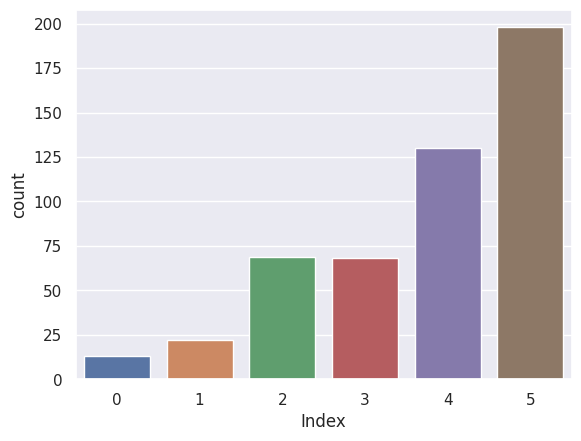

In [ ]:
sns.set()
sns.countplot(x='Index',data=bmi_data)

<Axes: xlabel='Index', ylabel='count'>

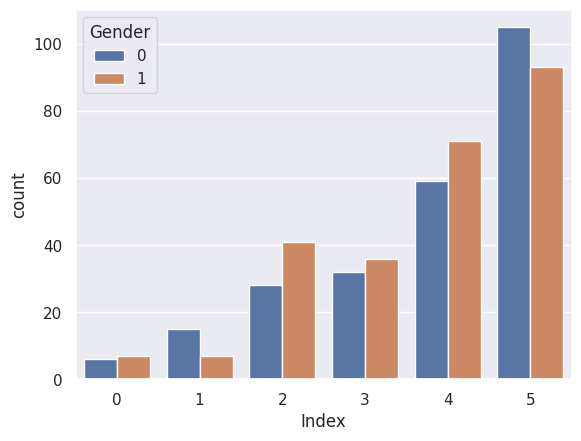

In [ ]:
sns.countplot(x='Index',hue='Gender',data=bmi_data)

In [ ]:
x=bmi_data.drop(columns='Index',axis=1)
y=bmi_data['Index']

In [ ]:
print(x)

     Gender  Height  Weight
0         0     174      96
1         0     189      87
2         1     185     110
3         1     195     104
4         0     149      61
..      ...     ...     ...
495       1     150     153
496       1     184     121
497       1     141     136
498       0     150      95
499       0     173     131

[500 rows x 3 columns]


In [ ]:
print(y)

0      4
1      2
2      4
3      3
4      3
      ..
495    5
496    4
497    5
498    5
499    5
Name: Index, Length: 500, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(500, 3) (400, 3) (100, 3)


In [ ]:
print(x_train)

     Gender  Height  Weight
257       1     150     119
190       0     141      85
318       0     170      95
100       0     199     156
278       0     172      75
..      ...     ...     ...
74        1     185     100
284       1     192     139
15        1     153     107
429       1     165      95
67        1     168      59

[400 rows x 3 columns]


In [ ]:
print(y_train)

257    5
190    5
318    4
100    4
278    3
      ..
74     3
284    4
15     5
429    4
67     2
Name: Index, Length: 400, dtype: int64


In [ ]:
classifier=svm.SVC(kernel='linear')


In [ ]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
x_train_prediction=classifier.predict(x_train)
train_data_accuracy=accuracy_score(y_train,x_train_prediction)

In [ ]:
print('training data accuracy is ',train_data_accuracy)

training data accuracy is  0.955


In [ ]:
x_test_prediction=classifier.predict(x_test)
test_data_accuracy=accuracy_score(y_test,x_test_prediction)

In [ ]:
print('the test data accuracy ',test_data_accuracy)

the test data accuracy  0.94


In [ ]:
x_test.to_csv('bmi_data.csv',index=False)
from google.colab import files
files.download('bmi_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
input_data=(1,187,92)
input_data_array=np.array(input_data)
input_data_reshaped=input_data_array.reshape(1,-1)

prediction=classifier.predict(input_data_reshaped)
print(prediction[0])

if(prediction[0]==0):
  print('the person is extreamly week')
elif(prediction[0]==1):
  print('the person is week')
elif(prediction[0]==2):
  print('the person is normal')
elif(prediction[0]==3):
  print('the person is overweighted')
elif(prediction[0]==4):
  print('the perdon suffers from obisity')
else:
  print('the person suffer from extream obisity')

3
the person is overweighted


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
